Transition matrix (rows sum to 1):
[[0.98708227 0.01291773]
 [0.04166358 0.95833642]]
Model converged: True
Converged in 40 iterations (tol = 0.01 )
State means: [ 0.00071555 -0.00128752]
State stds:  [0.00636463 0.0172233 ]
Bull state: 0, Bear state: 1


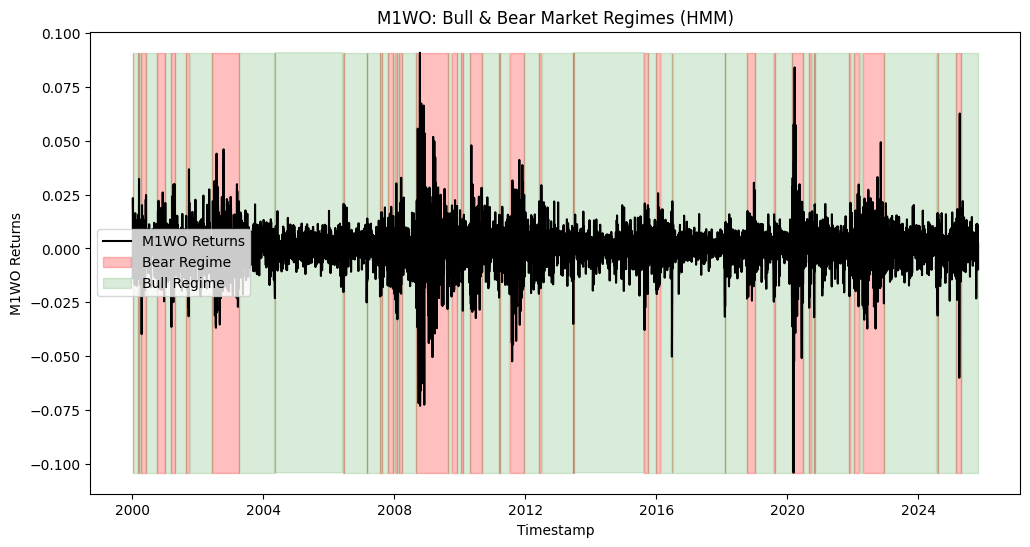

In [3]:
import pandas as pd
import numpy as np
import os, sys
sys.path.insert(0, os.path.abspath('../..'))
import source.data_handling.data_preparation as dp
import source.Classification.models_classification as modl
from source.plot_functions.plot_functions_classification import (plot_price_regime_with_error_types_a4,plot_prob_with_boot_ci_and_error_rugs_a4, plot_expanding_accuracy_with_boot_ci_a4,print_metrics_with_bootstrap_uncertainty_and_ci)

import numpy as np
import pandas as pd
df = dp.create_classification_data(quiet=False)

In [4]:
feature_cols = ["CL1","M1WO","SXXT","SPX","NKY","SPTR","EUR003M","FEDL01","GC1","V2X","MOVE","VIX","USYC2Y10","VXJ"]

y_true, y_pred,y_prob, dates = modl.expanding_oos_refit_every_cls(
    df,
    feature_cols=feature_cols,
    target_col="state",
    start_oos="2007-01-01",
    start_date="2000-01-05",
    min_train=120,
    refit_every=30,      # fit monthly (approx 30 trading days)
    model="logit",          # "logit" | "rf" | "tabpfn25" | "mantis_head" | "mantis_rf_head"
    seed=42,
    quiet=False,
)

# Evaluate performance with standard metrics from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
roc_auc = roc_auc_score(y_true, y_prob)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")  
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

CPU worker processing block starting at index 0, date 2007-01-01
CPU worker processing block starting at index 30, date 2007-02-12
CPU worker processing block starting at index 60, date 2007-03-26
CPU worker processing block starting at index 90, date 2007-05-07
CPU worker processing block starting at index 120, date 2007-06-18
CPU worker processing block starting at index 150, date 2007-07-30
CPU worker processing block starting at index 180, date 2007-09-10
CPU worker processing block starting at index 210, date 2007-10-22
CPU worker processing block starting at index 240, date 2007-12-03
CPU worker processing block starting at index 270, date 2008-01-14
CPU worker processing block starting at index 300, date 2008-02-25
CPU worker processing block starting at index 330, date 2008-04-07
CPU worker processing block starting at index 360, date 2008-05-19
CPU worker processing block starting at index 390, date 2008-06-30
CPU worker processing block starting at index 420, date 2008-08-11


In [3]:
feature_cols = ["CL1","M1WO","SXXT","SPX","NKY","SPTR","EUR003M","FEDL01","GC1","V2X","MOVE","VIX","USYC2Y10","VXJ"]

y_true, y_pred, y_prob, dates = modl.expanding_oos_refit_every_cls(
    df,
    feature_cols=feature_cols,
    target_col="state",
    start_oos="2007-01-01",
    start_date="2000-01-05",
    min_train=120,
    refit_every=700,      # fit monthly (approx 30 trading days)
    model="rf",          # "logit" | "rf" | "tabpfn25" | "mantis_head" | "mantis_rf_head"
    seed=42,
    quiet=False,
)

# Evaluate performance with standard metrics from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")  
print(f"F1 Score: {f1:.4f}")

CPU worker processing block starting at index 0, date 2007-01-01
CPU worker processing block starting at index 700, date 2009-09-07
CPU worker processing block starting at index 1400, date 2012-05-14
CPU worker processing block starting at index 2100, date 2015-01-19
CPU worker processing block starting at index 2800, date 2017-09-25
CPU worker processing block starting at index 3500, date 2020-06-01
CPU worker processing block starting at index 4200, date 2023-02-06
CPU worker processing block starting at index 4900, date 2025-10-13
Accuracy: 0.8822
Precision: 0.7913
Recall: 0.7067
F1 Score: 0.7466


In [19]:
feature_cols = ["CL1","M1WO","SXXT","SPX","NKY","SPTR","EUR003M","FEDL01","GC1","V2X","MOVE","VIX","USYC2Y10","VXJ"]

y_true, y_pred,y_prob, dates = modl.expanding_oos_refit_every_cls(
    df,
    feature_cols=feature_cols,
    target_col="state",
    start_oos="2007-01-01",
    start_date="2000-01-05",
    min_train=120,
    refit_every=30,      # fit monthly (approx 30 trading days)
    model="majority",          # "logit" | "rf" | "tabpfn25" | "mantis_head" | "mantis_rf_head"
    seed=42,
    quiet=False,
)

# Evaluate performance with standard metrics from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")  
print(f"F1 Score: {f1:.4f}")

CPU worker processing block starting at index 0, date 2007-01-01
CPU worker processing block starting at index 30, date 2007-02-12
CPU worker processing block starting at index 60, date 2007-03-26
CPU worker processing block starting at index 90, date 2007-05-07
CPU worker processing block starting at index 120, date 2007-06-18
CPU worker processing block starting at index 150, date 2007-07-30
CPU worker processing block starting at index 180, date 2007-09-10
CPU worker processing block starting at index 210, date 2007-10-22
CPU worker processing block starting at index 240, date 2007-12-03
CPU worker processing block starting at index 270, date 2008-01-14
CPU worker processing block starting at index 300, date 2008-02-25
CPU worker processing block starting at index 330, date 2008-04-07
CPU worker processing block starting at index 360, date 2008-05-19
CPU worker processing block starting at index 390, date 2008-06-30
CPU worker processing block starting at index 420, date 2008-08-11


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [21]:
(y_pred == 0).all()

True

In [5]:
feature_cols = ["CL1","M1WO","SXXT","SPX","NKY","SPTR","EUR003M","FEDL01","GC1","V2X","MOVE","VIX","USYC2Y10","VXJ"]

y_true, y_pred,y_prob, dates = modl.expanding_oos_refit_every_cls(
    df,
    feature_cols=feature_cols,
    target_col="state",
    start_oos="2007-01-01",
    start_date="2000-01-05",
    min_train=120,
    refit_every=1000,      # fit monthly (approx 30 trading days)
    model="mantis_head",          # "logit" | "rf" | "tabpfn25" | "mantis_head" | "mantis_rf_head"
    seed=42,
    quiet=False,
)

# Evaluate performance with standard metrics from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")  
print(f"F1 Score: {f1:.4f}")

[mantis_head] refit at 2007-01-01 using data up to 2006-12-29 | predicted 1000 days
[mantis_head] refit at 2010-11-01 using data up to 2010-10-29 | predicted 1000 days
[mantis_head] refit at 2014-09-01 using data up to 2014-08-29 | predicted 1000 days
[mantis_head] refit at 2018-07-02 using data up to 2018-06-29 | predicted 1000 days
[mantis_head] refit at 2022-05-02 using data up to 2022-04-29 | predicted 915 days
Accuracy: 0.6826
Precision: 0.3417
Recall: 0.3157
F1 Score: 0.3282


In [3]:
feature_cols = ["CL1","M1WO","SXXT","SPX","NKY","SPTR","EUR003M","FEDL01","GC1","V2X","MOVE","VIX","USYC2Y10","VXJ"]

y_true, y_pred,y_prob, dates = modl.expanding_oos_refit_every_cls(
    df,
    feature_cols=feature_cols,
    target_col="state",
    start_oos="2007-01-01",
    start_date="2000-01-05",
    min_train=120,
    refit_every=1000,      # fit monthly (approx 30 trading days)
    model="tabpfn25",          # "logit" | "rf" | "tabpfn25" | "mantis_head" | "mantis_rf_head"
    seed=42,
    quiet=False,
)

# Evaluate performance with standard metrics from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")  

[tabpfn25] refit at 2007-01-01 using data up to 2006-12-29 | predicted 1000 days
[tabpfn25] refit at 2010-11-01 using data up to 2010-10-29 | predicted 1000 days
[tabpfn25] refit at 2014-09-01 using data up to 2014-08-29 | predicted 1000 days
[tabpfn25] refit at 2018-07-02 using data up to 2018-06-29 | predicted 1000 days
[tabpfn25] refit at 2022-05-02 using data up to 2022-04-29 | predicted 915 days
Accuracy: 0.8547
Precision: 0.8039
Recall: 0.5402


In [ ]:
feature_cols = ["CL1","M1WO","SXXT","SPX","NKY","SPTR","EUR003M","FEDL01","GC1","V2X","MOVE","VIX","USYC2Y10","VXJ"]

y_true, y_pred, dates = modl.expanding_oos_refit_every_cls(
    df,
    feature_cols=feature_cols,
    target_col="state",
    start_oos="2007-01-01",
    start_date="2000-01-05",
    min_train=120,
    refit_every=1000,      # fit monthly (approx 30 trading days)
    model="mantis_rf_head",          # "logit" | "rf" | "tabpfn25" | "mantis_head" | "mantis_rf_head"
    seed=42,
    quiet=False,
)

# Evaluate performance with standard metrics from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
auc = roc_auc_score(y_true==1, y_prob)  # p_bear is predicted prob of class 1
print(f"AUC: {auc:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")  
print(f"F1 Score: {f1:.4f}")

[mantis_rf_head] refit at 2007-01-01 using data up to 2006-12-29 | predicted 1000 days
[mantis_rf_head] refit at 2010-11-01 using data up to 2010-10-29 | predicted 1000 days
[mantis_rf_head] refit at 2014-09-01 using data up to 2014-08-29 | predicted 1000 days
[mantis_rf_head] refit at 2018-07-02 using data up to 2018-06-29 | predicted 1000 days
[mantis_rf_head] refit at 2022-05-02 using data up to 2022-04-29 | predicted 915 days
Accuracy: 0.7662
Precision: 1.0000
Recall: 0.0481
F1 Score: 0.0917


In [5]:
pred_draws_df = pd.read_csv("../../Data/ModelData/pred_draws_df.csv", parse_dates=["timestamp"], index_col=0)

In [6]:
# add y_true y_pred and dates as a dataframe new one
pred_df = pd.DataFrame({
    "timestamp": dates,
    "y_true": y_true,
    "y_pred": y_pred,
    "pred_prob": y_prob
})
pred_df = pred_df.merge(df[["timestamp", "M1WO_O"]], on="timestamp", how="left")

In [8]:
pred_draws_df

,boot_id,y_true,p1,y_pred_draw
timestamp,,,,
2007-01-01,0,0,0.001387,0
2007-01-01,1,0,0.003079,0
2007-01-01,2,0,0.000000,0
2007-01-01,3,0,0.004564,0
2007-01-01,4,0,0.008706,0
...,...,...,...,...
2025-10-31,195,0,0.058485,0
2025-10-31,196,0,0.073750,0
2025-10-31,197,0,0.107655,0


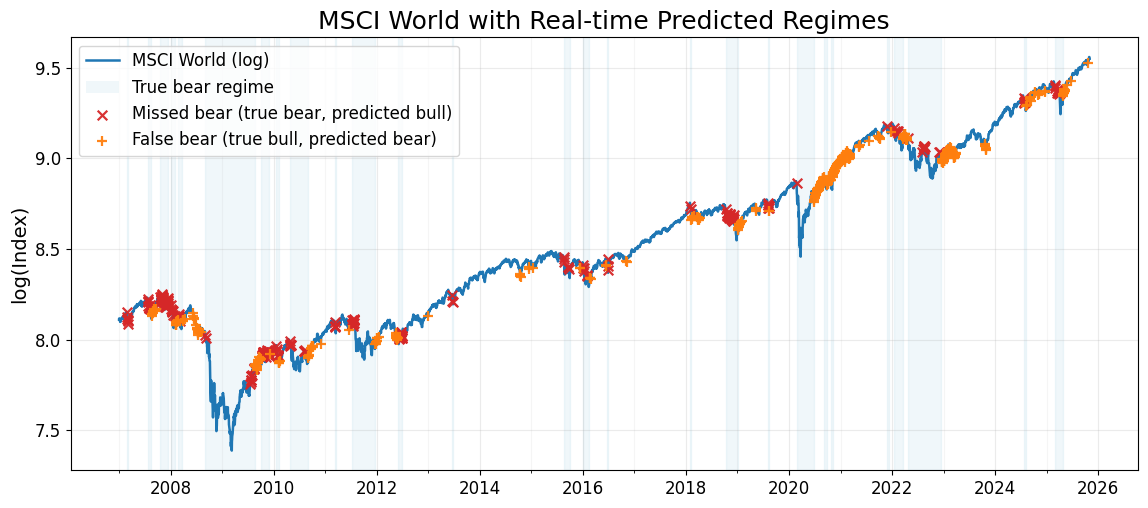

In [ ]:

plot_price_regime_with_error_types_a4(
    pred_df,
    price_col="M1WO_O",
    bear_label=1,
    log_price=True,
    shade_alpha=0.18,
    min_shade_run=1,
    title="MSCI World with Real-time Predicted Regimes",
)



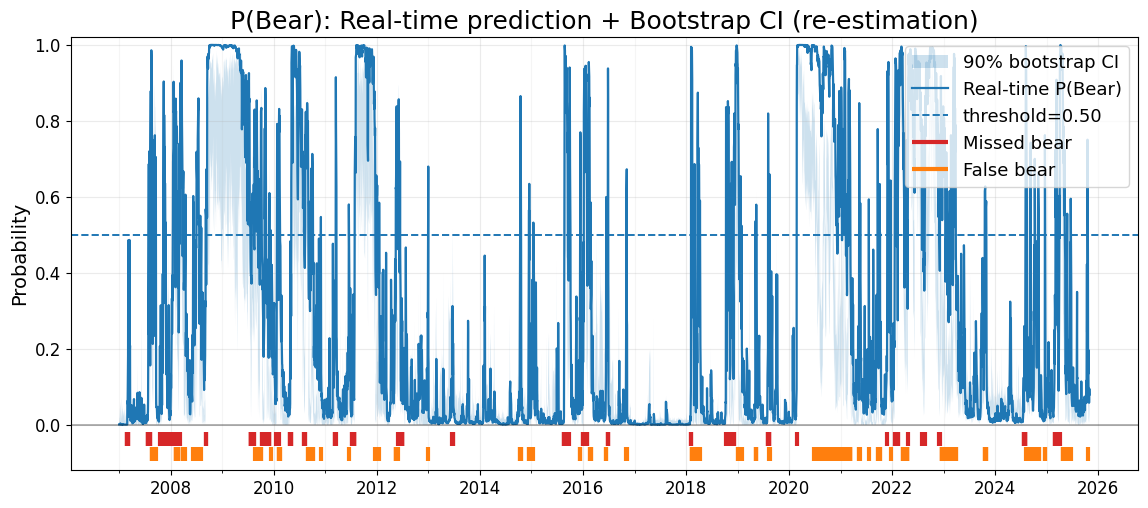

In [ ]:


plot_prob_with_boot_ci_and_error_rugs_a4(
    pred_df,
    pred_draws_df,
    prob_col="pred_prob",
    p1_col_draws="p1",
    alpha=0.10,
    threshold=0.5,
    bear_label=1,
    title="P(Bear): Real-time prediction + Bootstrap CI (re-estimation)"
)


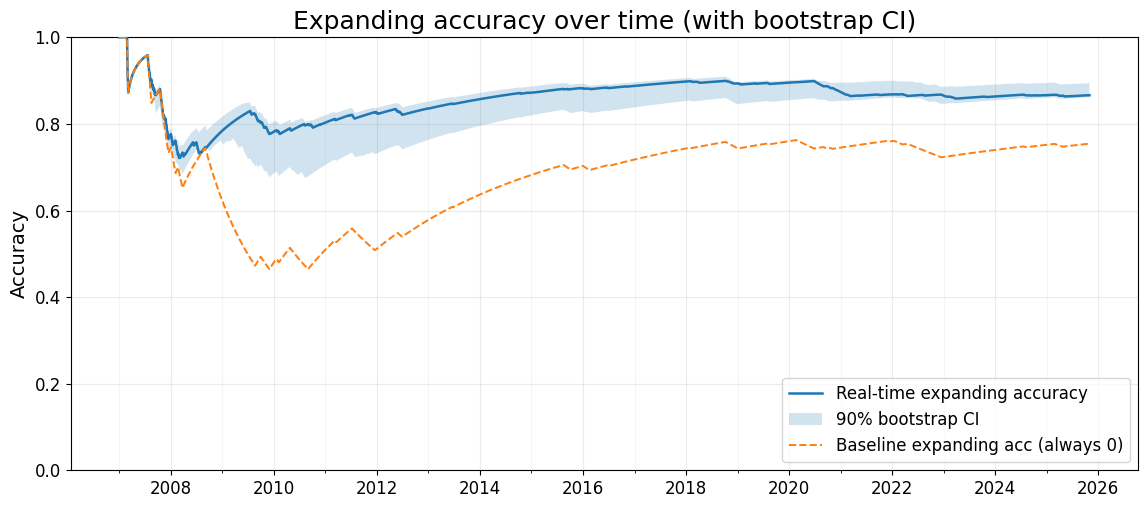

In [ ]:

# Example usage:
plot_expanding_accuracy_with_boot_ci_a4(
    pred_df,
    pred_draws_df,
    p1_col_draws="p1",
    alpha=0.10,
    threshold=0.5,
    baseline_label=0,
    title="Expanding accuracy over time (with bootstrap CI)",
)


In [7]:


print_metrics_with_bootstrap_uncertainty_and_ci(
    y_true=y_true,
    y_pred=y_pred,
    y_prob=y_prob,
    pred_draws_df=pred_draws_df,
    threshold=0.5,
    p1_col="p1"
)




Model Performance (point + bootstrap mean/std + CI)
--------------------------------------------------------------------------------------
Metric         Point  Boot mean   Boot std     CI lo     CI hi   Nboot
--------------------------------------------------------------------------------------
Accuracy      0.8663     0.8831     0.0110    0.8612    0.8940     200
Precision     0.6999     0.8588     0.0207    0.8258    0.8958     200
Recall        0.7978     0.6283     0.0578    0.5094    0.7018     200
F1            0.7456     0.7237     0.0385    0.6464    0.7640     200
ROC AUC       0.9349     0.9250     0.0056    0.9143    0.9332     200
--------------------------------------------------------------------------------------
CI level: 90%  |  threshold: 0.50



In [8]:
pred_df.to_csv("../../Data/ModelData/pred_df_loop.csv")